# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

From both the histogram and a percentile plot, we can see that the distribution of temperatures is nearly normal. The shapiro normality test bears this out by failing to reject the null hypothesis.

In [2]:
# Your work here.
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df.head()
mean_temp = df['temperature'].mean()
std_temp = df['temperature'].std()
exp_temp = np.array(df['temperature'])
normal_temp = np.random.normal(mean_temp,std_temp, 5000)

fig,ax = plt.subplots(figsize=(8,5))
ax.hist(exp_temp,bins = 25,color = 'blue',alpha = 0.5,density = True,label='Temperature Data')
ax.hist(normal_temp, bins = 50,color = 'red',alpha = 0.5,density = True,label = 'Normal Data')
ax.set_xlabel('Temperature')
ax.set_ylabel('Count')
ax.set_title('Distribution of Temperature Data and Normal Distribution')
h, l = ax.get_legend_handles_labels()
ax.legend(h,l)
plt.show()

<Figure size 800x500 with 1 Axes>

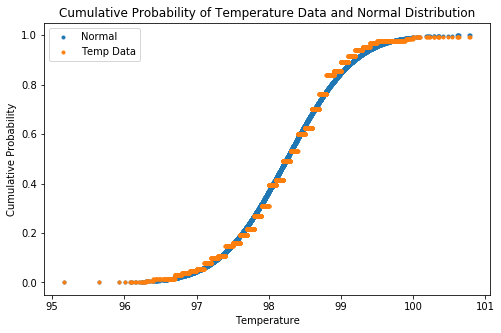

In [3]:
#Q_normal = np.empty(len(normal_temp))
c_normal = stats.norm.cdf((normal_temp-mean_temp)/std_temp)
exp_temp.sort()
exp_cdf = np.empty(len(normal_temp))
for i,temp in enumerate(normal_temp):
    exp_cdf[i] = np.sum(exp_temp<=temp)/len(exp_temp)

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(normal_temp,c_normal,linestyle = 'none',marker = '.',label = 'Normal')
ax.plot(normal_temp,exp_cdf,linestyle='none',marker='.',label = 'Temp Data')
ax.set_xlabel('Temperature')
ax.set_ylabel('Cumulative Probability')
ax.set_title('Cumulative Probability of Temperature Data and Normal Distribution')
h, l = ax.get_legend_handles_labels()
ax.legend(h,l)
plt.show()

In [4]:
stat, p = stats.shapiro(exp_temp)
print('The distribution is likely normal with a p-value of' ,round(p,2))

The distribution is likely normal with a p-value of 0.23


In [5]:
#Number of samples
print(len(df['temperature']))

130


The sample size is not terribly large, but it is likely large enough. Presumably the samples were gathered independently, however we would have to look at the methodology to assess whether or not the measurements were independent.

The bootstrap test gives a 0 p-value, and thus rejects the null hypothesis that the true temperature is 98.6 degrees. The t and z tests give the same conclusion. The z-test is more certain with a lower p-value. This has to do with the fact that the normal distribution has shorter tails than the t distribution, and may give greater certainty than is warranted.

When both tests are repeated with a sample size of 10, the t-test fails to reject the null hypothesis whereas the z-test rejects it. With such a small sample size it is most likely inappropriate to reject the null hypothesis with such certainty (p-value 0.015) as the z-test gives.

In [6]:
true_temp = 98.6
exp_mean = np.mean(exp_temp)
shifted_exp_temp = exp_temp - exp_mean + true_temp
temp_replicates = np.empty(10000)
for i in range(10000):
    temp_replicates[i] = np.mean(np.random.choice(shifted_exp_temp,len(exp_temp)))
p = np.sum(temp_replicates <= exp_mean)/10000
print(np.format_float_scientific(p,2))

0.e+00


In [7]:
t_statistic, p_value = stats.ttest_1samp(exp_temp,true_temp)
p_value_z = stats.norm.cdf(t_statistic)
print('t-statistic:',round(t_statistic,1),'p-value(t):', 
      np.format_float_scientific(p_value/2,2),'p-value(z):',np.format_float_scientific(p_value_z,2))

t-statistic: -5.5 p-value(t): 1.21e-07 p-value(z): 2.45e-08


In [8]:
np.random.seed(42)
samp_temp = np.random.choice(exp_temp,10)

t_statistic = np.sqrt(len(samp_temp)-1)*np.mean(samp_temp - true_temp)/np.std(samp_temp)
p_value = stats.t.cdf(t_statistic,len(samp_temp)-1)

z_statistic = np.sqrt(len(exp_temp)-1)*np.mean(samp_temp-true_temp)/np.std(exp_temp)
p_value_z = stats.norm.cdf(z_statistic)
print('t-statistic:',round(t_statistic,2),'p-value:',round(p_value,2),
      'z-statistic:',round(z_statistic,2),'p-value:',np.format_float_scientific(p_value_z,2))

t-statistic: -0.76 p-value: 0.23 z-statistic: -2.18 p-value: 1.47e-02


In [9]:
true_temp = 98.6
exp_mean = np.mean(exp_temp)
shifted_exp_temp = exp_temp - np.mean(exp_temp) + true_temp
replicate_mean = np.empty(10000)
for i in range(10000):
    replicate_sample = np.random.choice(shifted_exp_temp,len(shifted_exp_temp))
    replicate_mean[i] = np.mean(replicate_sample)
p = np.sum(replicate_mean < exp_mean)/10000
p

0.0

The confidence interval covers 98.1 to 98.4 degrees Fahrenheit. A reasonable definition of 'abnormal' temperature may then be temperatures that lie outside of this range. When we look at the difference between men's and women's temperatures however, we see that there is a meaningful difference, with the mean male temperature being 0.3 degrees lower than the mean female temperature. 

Since this difference spans the entirety of our confidence interval, it may be best to define a 'normal' temperature range separately for men and women. Constructing these confidence intervals gives men a normal temperature range of 97.9 - 98.3 and women a normal temperature range of 98.2 - 98.6.

In [10]:
replicate_mean = np.empty(10000)
for i in range(10000):
    replicate_sample = np.random.choice(exp_temp,len(exp_temp))
    replicate_mean[i] = np.mean(replicate_sample)
replicate_mean.sort()
ci = [round(replicate_mean[250],2),round(replicate_mean[9750],2)]
me = round((ci[1]-ci[0])/2,2)
print('The confidence intervale is:',ci,'and the margin of error is:',me)

The confidence intervale is: [98.12, 98.37] and the margin of error is: 0.12


In [11]:
men_temp = df[df['gender']=='M']['temperature']
women_temp = df[df['gender']=='F']['temperature']
men_temp_mean = np.mean(men_temp)
women_temp_mean = np.mean(women_temp)
t_statistic, p_value = stats.ttest_ind(men_temp,women_temp,equal_var = False)
print('The mean difference between men and women is',round(men_temp_mean - women_temp_mean,2),
      't-statistic',round(t_statistic,2),'with a p-value of',round(p_value,2))

The mean difference between men and women is -0.29 t-statistic -2.29 with a p-value of 0.02


In [12]:
replicate_mean = np.empty(10000)
for i in range(10000):
    replicate_sample = np.random.choice(men_temp,len(men_temp))
    replicate_mean[i] = np.mean(replicate_sample)
replicate_mean.sort()
ci = [round(replicate_mean[250],2),round(replicate_mean[9750],2)]
print('The confidence interval for men is:',ci)

replicate_mean = np.empty(10000)
for i in range(10000):
    replicate_sample = np.random.choice(women_temp,len(women_temp))
    replicate_mean[i] = np.mean(replicate_sample)
replicate_mean.sort()
ci = [round(replicate_mean[250],2),round(replicate_mean[9750],2)]
print('The confidence interval for women is:',ci)

The confidence interval for men is: [97.94, 98.27]
The confidence interval for women is: [98.22, 98.58]
